In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:

# Charger les données
data_file_path = 'dermatology.data'
names_file_path = 'dermatology.names'

# Lire le fichier .names pour comprendre les colonnes
with open(names_file_path, 'r') as file:
    names_info = file.readlines()

# Affichage les lignes du fichier .names pour analyse
names_info


['1. Title: Dermatology Database\n',
 '\n',
 '2. Source Information:\n',
 '   (a) Original owners:\n',
 '       -- 1. Nilsel Ilter, M.D., Ph.D., \n',
 '             Gazi University, \n',
 '             School of Medicine\n',
 '             06510 Ankara, Turkey\n',
 '             Phone: +90 (312) 214 1080\n',
 '\n',
 '       -- 2. H. Altay Guvenir, PhD., \n',
 '             Bilkent University,\n',
 '             Department of Computer Engineering and Information Science,\n',
 '             06533 Ankara, Turkey\n',
 '             Phone: +90 (312) 266 4133\n',
 '             Email: guvenir@cs.bilkent.edu.tr\n',
 '\n',
 '   (b) Donor: H. Altay Guvenir,\n',
 '              Bilkent University,\n',
 '              Department of Computer Engineering and Information Science,\n',
 '              06533 Ankara, Turkey\n',
 '              Phone: +90 (312) 266 4133\n',
 '              Email: guvenir@cs.bilkent.edu.tr\n',
 '\n',
 '   (c) Date:  January, 1998\n',
 '\n',
 '3. Past Usage:\n',
 '   1. G.

In [23]:
# Charger les données du fichier .data pour visualisation
data = pd.read_csv(data_file_path, header=None)

# Afficher les 5 premières lignes pour comprendre la structure
data.head()


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [24]:

# Charger les noms des colonnes depuis le fichier .names
column_names = []
temp=0
with open(names_file_path, 'r') as file:
    for line in file:
        temp += 1
        #print(f"{temp}:")
        # Construire la chaîne à rechercher avec temp converti en chaîne
        search_string = str(temp) + ":"
        if ":" in line:  # Détecter les lignes contenant "index: nom_attribut"
            attribute = line.split(":")[1].strip()  # Extraire le nom après ":"
            column_names.append(attribute)

index_1 = column_names.index("erythema")
index_2 = column_names.index("band-like infiltrate")

# Extraire la portion de la liste entre "Rose" et "Adam" inclusivement
column_names = column_names[index_1:index_2 + 1]            
column_names.remove('(take values 0, 1, 2, 3)')
column_names.remove('Age (linear)')
column_names.append('Age')
column_names.append('class')
column_names[10] = 'family history'
# Vérification des noms détectés
print(f"Noms des colonnes détectés ({len(column_names)}):\n", column_names)


Noms des colonnes détectés (35):
 ['erythema', 'scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules', 'follicular papules', 'oral mucosal involvement', 'knee and elbow involvement', 'scalp involvement', 'family history', 'melanin incontinence', 'eosinophils in the infiltrate', 'PNL infiltrate', 'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges', 'elongation of the rete ridges', 'thinning of the suprapapillary epidermis', 'spongiform pustule', 'munro microabcess', 'focal hypergranulosis', 'disappearance of the granular layer', 'vacuolisation and damage of basal layer', 'spongiosis', 'saw-tooth appearance of retes', 'follicular horn plug', 'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate', 'band-like infiltrate', 'Age', 'class']


In [25]:

# Vérifier la correspondance du nombre de colonnes
if len(column_names) == data.shape[1]:
    data.columns = column_names
    print("Les colonnes ont été renommées avec succès.")
else:
    print(f"Le nombre de colonnes dans les données ({data.shape[1]}) "
          f"ne correspond pas au nombre de noms extraits ({len(column_names)}).")

# Supression colonne age
data = data.drop('Age', axis=1)
# Sauvegarder le fichier nettoyé
data.to_csv("dermatology_cleaned.csv", index=False)
print("Données nettoyées et sauvegardées dans 'dermatology_cleaned.csv'.")

Les colonnes ont été renommées avec succès.
Données nettoyées et sauvegardées dans 'dermatology_cleaned.csv'.


In [26]:
data = pd.read_csv('dermatology_cleaned.csv')

data.head(15)

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,3
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,5
7,2,2,3,3,3,3,0,2,0,0,...,0,2,2,3,2,0,0,3,3,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,4


In [27]:
# Statistiques descriptives 
data.describe().T


,count,mean,std,min,25%,50%,75%,max
erythema,366.0,2.068306,0.664753,0.0,2.0,2.0,2.0,3.0
scaling,366.0,1.795082,0.701527,0.0,1.0,2.0,2.0,3.0
definite borders,366.0,1.549180,0.907525,0.0,1.0,2.0,2.0,3.0
itching,366.0,1.366120,1.138299,0.0,0.0,1.0,2.0,3.0
koebner phenomenon,366.0,0.633880,0.908016,0.0,0.0,0.0,1.0,3.0
polygonal papules,366.0,0.448087,0.957327,0.0,0.0,0.0,0.0,3.0
follicular papules,366.0,0.166667,0.570588,0.0,0.0,0.0,0.0,3.0
oral mucosal involvement,366.0,0.377049,0.834147,0.0,0.0,0.0,0.0,3.0
knee and elbow involvement,366.0,0.614754,0.982979,0.0,0.0,0.0,1.0,3.0
scalp involvement,366.0,0.519126,0.905639,0.0,0.0,0.0,1.0,3.0


In [28]:
# Afficher les premières lignes pour identifier les colonnes pertinentes
data.head()


,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,3
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,3


In [29]:
data.columns


Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'class'],
      dtype='object')

In [32]:
# Séparer les données en attributs cliniques, histopathologiques et cible
clinical_features = data.iloc[:, 0:11]
clinical_features.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history
0,2,2,0,3,0,0,0,0,1,0,0
1,3,3,3,2,1,0,0,0,1,1,1
2,2,1,2,3,1,3,0,3,0,0,0
3,2,2,2,0,0,0,0,0,3,2,0
4,2,3,2,2,2,2,0,2,0,0,0


In [33]:
histopathological_features = data.iloc[:, 11:33]
histopathological_features.head()

,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,...,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate
0,0,0,0,0,3,2,0,0,0,0,...,0,0,0,0,3,0,0,0,1,0
1,0,0,1,0,1,2,0,2,2,2,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,2,0,2,0,0,...,0,2,0,2,3,2,0,0,2,3
3,0,0,3,0,0,2,0,3,2,2,...,0,0,3,0,0,0,0,0,3,0
4,1,0,0,0,1,2,0,0,0,0,...,0,2,2,3,2,3,0,0,2,3


In [35]:

all_features = pd.concat([clinical_features, histopathological_features], axis=1)
all_features.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,0,3,0,0,0,1,0
1,3,3,3,2,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
2,2,1,2,3,1,3,0,3,0,0,...,0,2,0,2,3,2,0,0,2,3
3,2,2,2,0,0,0,0,0,3,2,...,0,0,3,0,0,0,0,0,3,0
4,2,3,2,2,2,2,0,2,0,0,...,0,2,2,3,2,3,0,0,2,3


### 1. Distribution des attributs cliniques et histopathologiques
- Examiner les distributions des variables pour identifier leurs caractéristiques principales (asymétrie, concentration des valeurs, etc.).
- Comparer ces distributions entre les différentes classes de maladies (`class`).

### 2. Corrélations entre les attributs
- Calculer les corrélations (matrice de corrélation) pour les variables cliniques et histopathologiques.
- Identifier les relations significatives (corrélations fortes positives ou négatives).

### 3. Associations avec la variable cible (`class`)
- Comparer les moyennes ou les fréquences des variables selon les classes.
- Visualiser ces associations à l'aide de graphiques (ex. boxplots ou heatmaps).


In [55]:
# Corrélations des attributs cliniques entre eux
clinical_corr = clinical_features.corr()
clinical_corr

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history
erythema,1.000000,0.435467,0.260087,-0.047623,0.000694,0.033571,-0.109550,-0.026810,0.141008,0.186684,0.172059
scaling,0.435467,1.000000,0.357987,-0.084197,-0.010576,-0.075035,-0.092400,-0.082969,0.298398,0.301577,0.181491
definite borders,0.260087,0.357987,1.000000,-0.062564,0.241342,0.327754,-0.166662,0.286684,0.302309,0.268862,0.115844
itching,-0.047623,-0.084197,-0.062564,1.000000,0.267878,0.409696,-0.144825,0.359163,-0.299645,-0.155639,-0.136615
koebner phenomenon,0.000694,-0.010576,0.241342,0.267878,1.000000,0.394108,-0.172741,0.392554,-0.066372,0.015202,-0.083247
polygonal papules,0.033571,-0.075035,0.327754,0.409696,0.394108,1.000000,-0.137093,0.865142,-0.276058,-0.253234,-0.151841
follicular papules,-0.109550,-0.092400,-0.166662,-0.144825,-0.172741,-0.137093,1.000000,-0.132394,0.222255,-0.003535,0.192866
oral mucosal involvement,-0.026810,-0.082969,0.286684,0.359163,0.392554,0.865142,-0.132394,1.000000,-0.283466,-0.259813,-0.151825
knee and elbow involvement,0.141008,0.298398,0.302309,-0.299645,-0.066372,-0.276058,0.222255,-0.283466,1.000000,0.659206,0.341915
scalp involvement,0.186684,0.301577,0.268862,-0.155639,0.015202,-0.253234,-0.003535,-0.259813,0.659206,1.000000,0.292728


In [39]:

# Corrélations des attributs histopathologiques entre eux
histopath_corr = histopathological_features.corr()
histopath_corr

,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,...,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate
melanin incontinence,1.000000,0.041129,-0.312386,-0.168862,0.391889,0.130277,-0.179071,-0.026993,-0.292861,-0.397832,...,-0.222975,0.896533,-0.137452,0.941659,0.058176,0.900232,-0.093466,-0.109458,0.259467,0.916848
eosinophils in the infiltrate,0.041129,1.000000,0.090818,-0.055676,0.205958,0.039494,-0.060577,-0.056344,-0.181691,-0.146453,...,-0.118513,0.062149,-0.166838,0.039921,0.155231,0.040898,-0.078212,-0.079672,-0.047391,0.028354
PNL infiltrate,-0.312386,0.090818,1.000000,-0.264694,-0.276134,-0.034219,0.029002,0.249271,0.385349,0.227344,...,0.235811,-0.307292,0.167440,-0.317573,-0.126969,-0.315693,-0.117591,-0.109655,-0.084324,-0.318776
fibrosis of the papillary dermis,-0.168862,-0.055676,-0.264694,1.000000,-0.175536,0.168461,0.093905,-0.236672,-0.214724,0.298454,...,-0.163571,-0.167838,-0.197275,-0.168569,-0.182669,-0.160735,-0.083917,-0.092747,-0.024470,-0.171967
exocytosis,0.391889,0.205958,-0.276134,-0.175536,1.000000,-0.177905,-0.193932,-0.349027,-0.625864,-0.708445,...,-0.512835,0.385172,-0.374887,0.380342,0.571287,0.383950,0.065998,0.058414,0.143742,0.381608
acanthosis,0.130277,0.039494,-0.034219,0.168461,-0.177905,1.000000,0.012378,0.178663,0.173271,0.323812,...,0.049673,0.119035,0.090835,0.130071,-0.070574,0.097693,-0.028502,-0.079968,0.131637,0.086486
hyperkeratosis,-0.179071,-0.060577,0.029002,0.093905,-0.193932,0.012378,1.000000,0.162103,0.235782,0.213545,...,0.247044,-0.165868,0.009854,-0.163193,-0.253060,-0.138476,0.096097,0.087759,-0.115426,-0.144124
parakeratosis,-0.026993,-0.056344,0.249271,-0.236672,-0.349027,0.178663,0.162103,1.000000,0.535745,0.403035,...,0.355610,-0.030600,0.289181,-0.032415,-0.230053,-0.037768,0.006593,0.011218,-0.007438,-0.066938
clubbing of the rete ridges,-0.292861,-0.181691,0.385349,-0.214724,-0.625864,0.173271,0.235782,0.535745,1.000000,0.724951,...,0.674602,-0.291793,0.590871,-0.295592,-0.506274,-0.299260,-0.127939,-0.132002,0.009043,-0.301875
elongation of the rete ridges,-0.397832,-0.146453,0.227344,0.298454,-0.708445,0.323812,0.213545,0.403035,0.724951,1.000000,...,0.490559,-0.396382,0.396297,-0.403981,-0.584347,-0.406526,-0.176317,-0.186463,0.018176,-0.416394


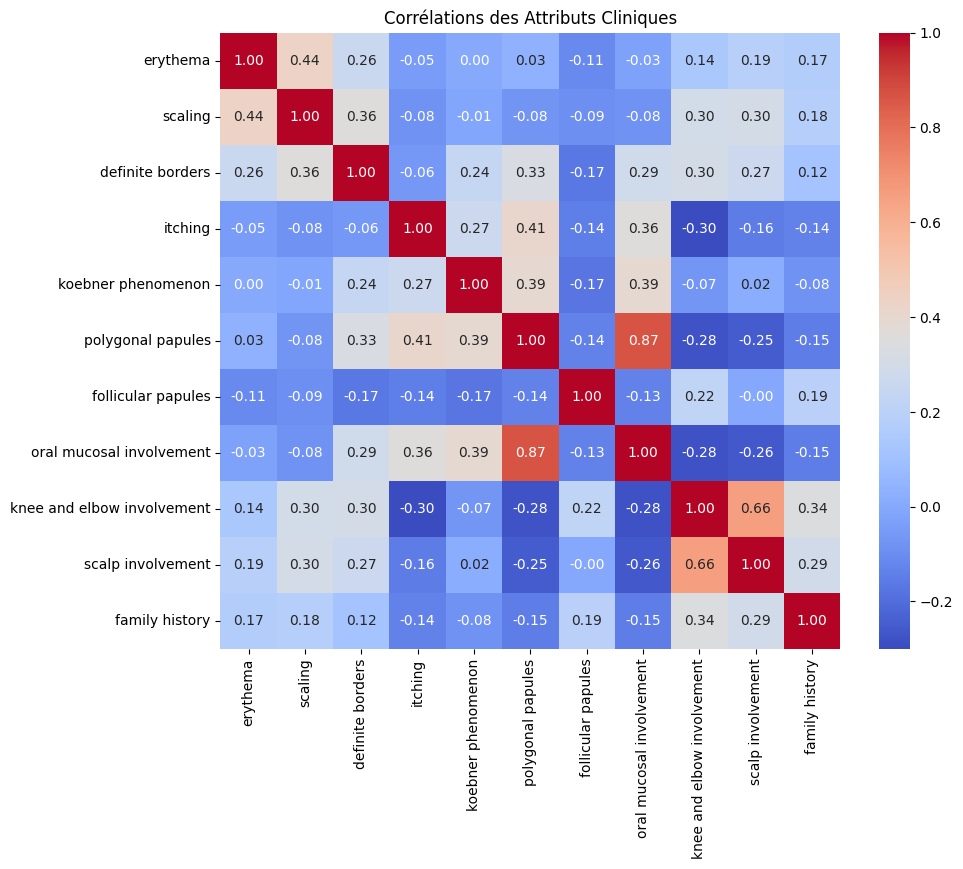

In [56]:

# Calcul des corrélations cliniques
clinical_corr = clinical_features.corr()

# Visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(clinical_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corrélations des Attributs Cliniques")
plt.show()


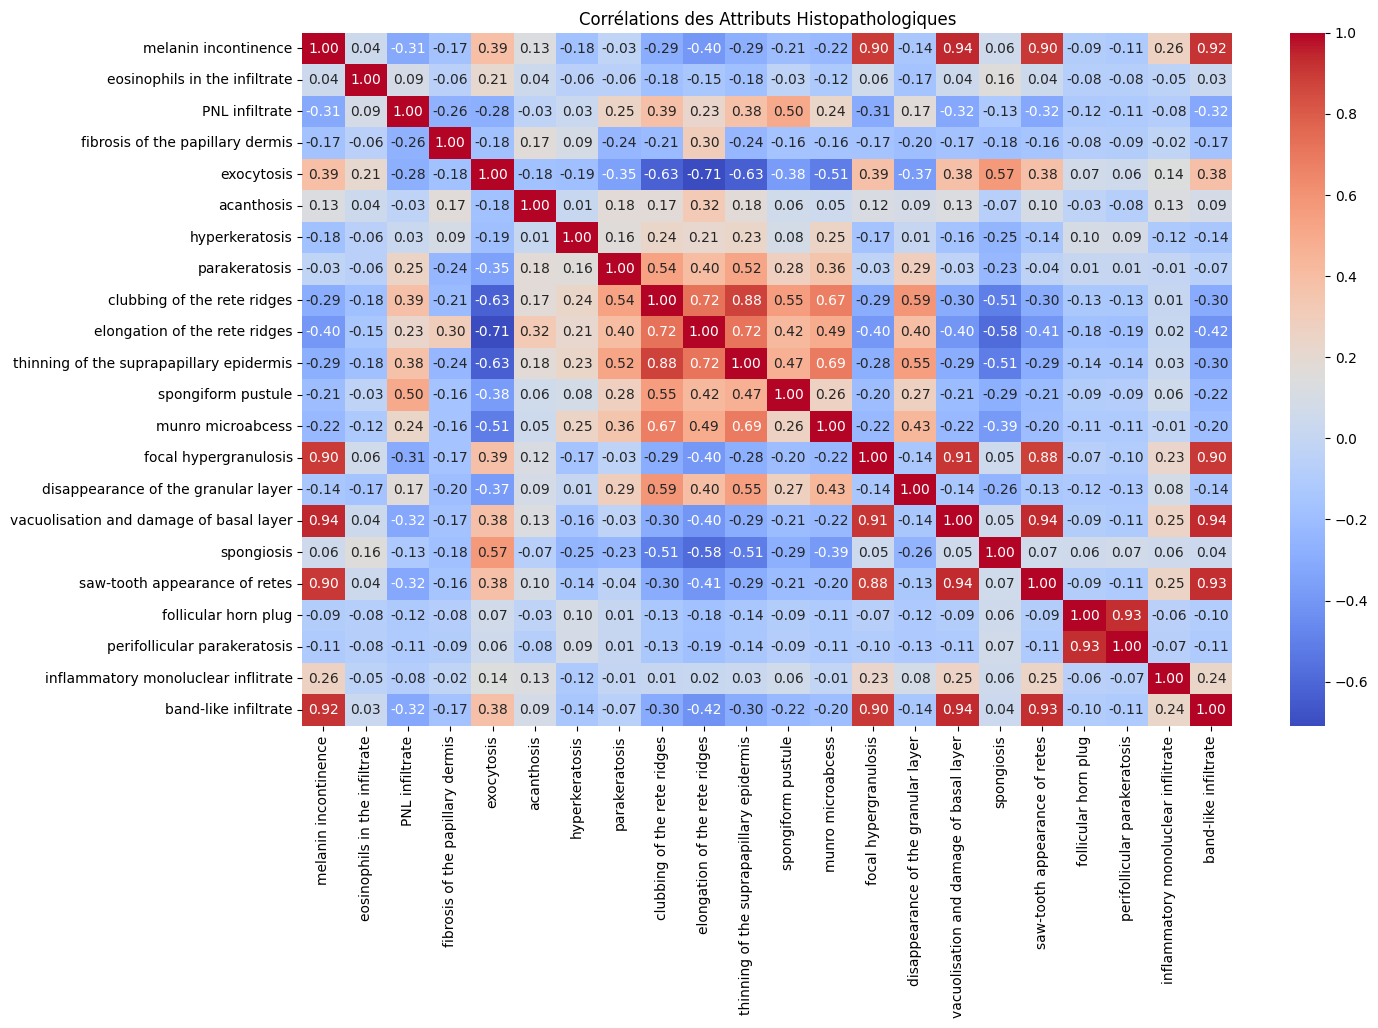

In [58]:
# Calcul des corrélations histopathologiques
histopath_corr = histopathological_features.corr()

# Visualisation
plt.figure(figsize=(15, 9))
sns.heatmap(histopath_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corrélations des Attributs Histopathologiques")
plt.show()


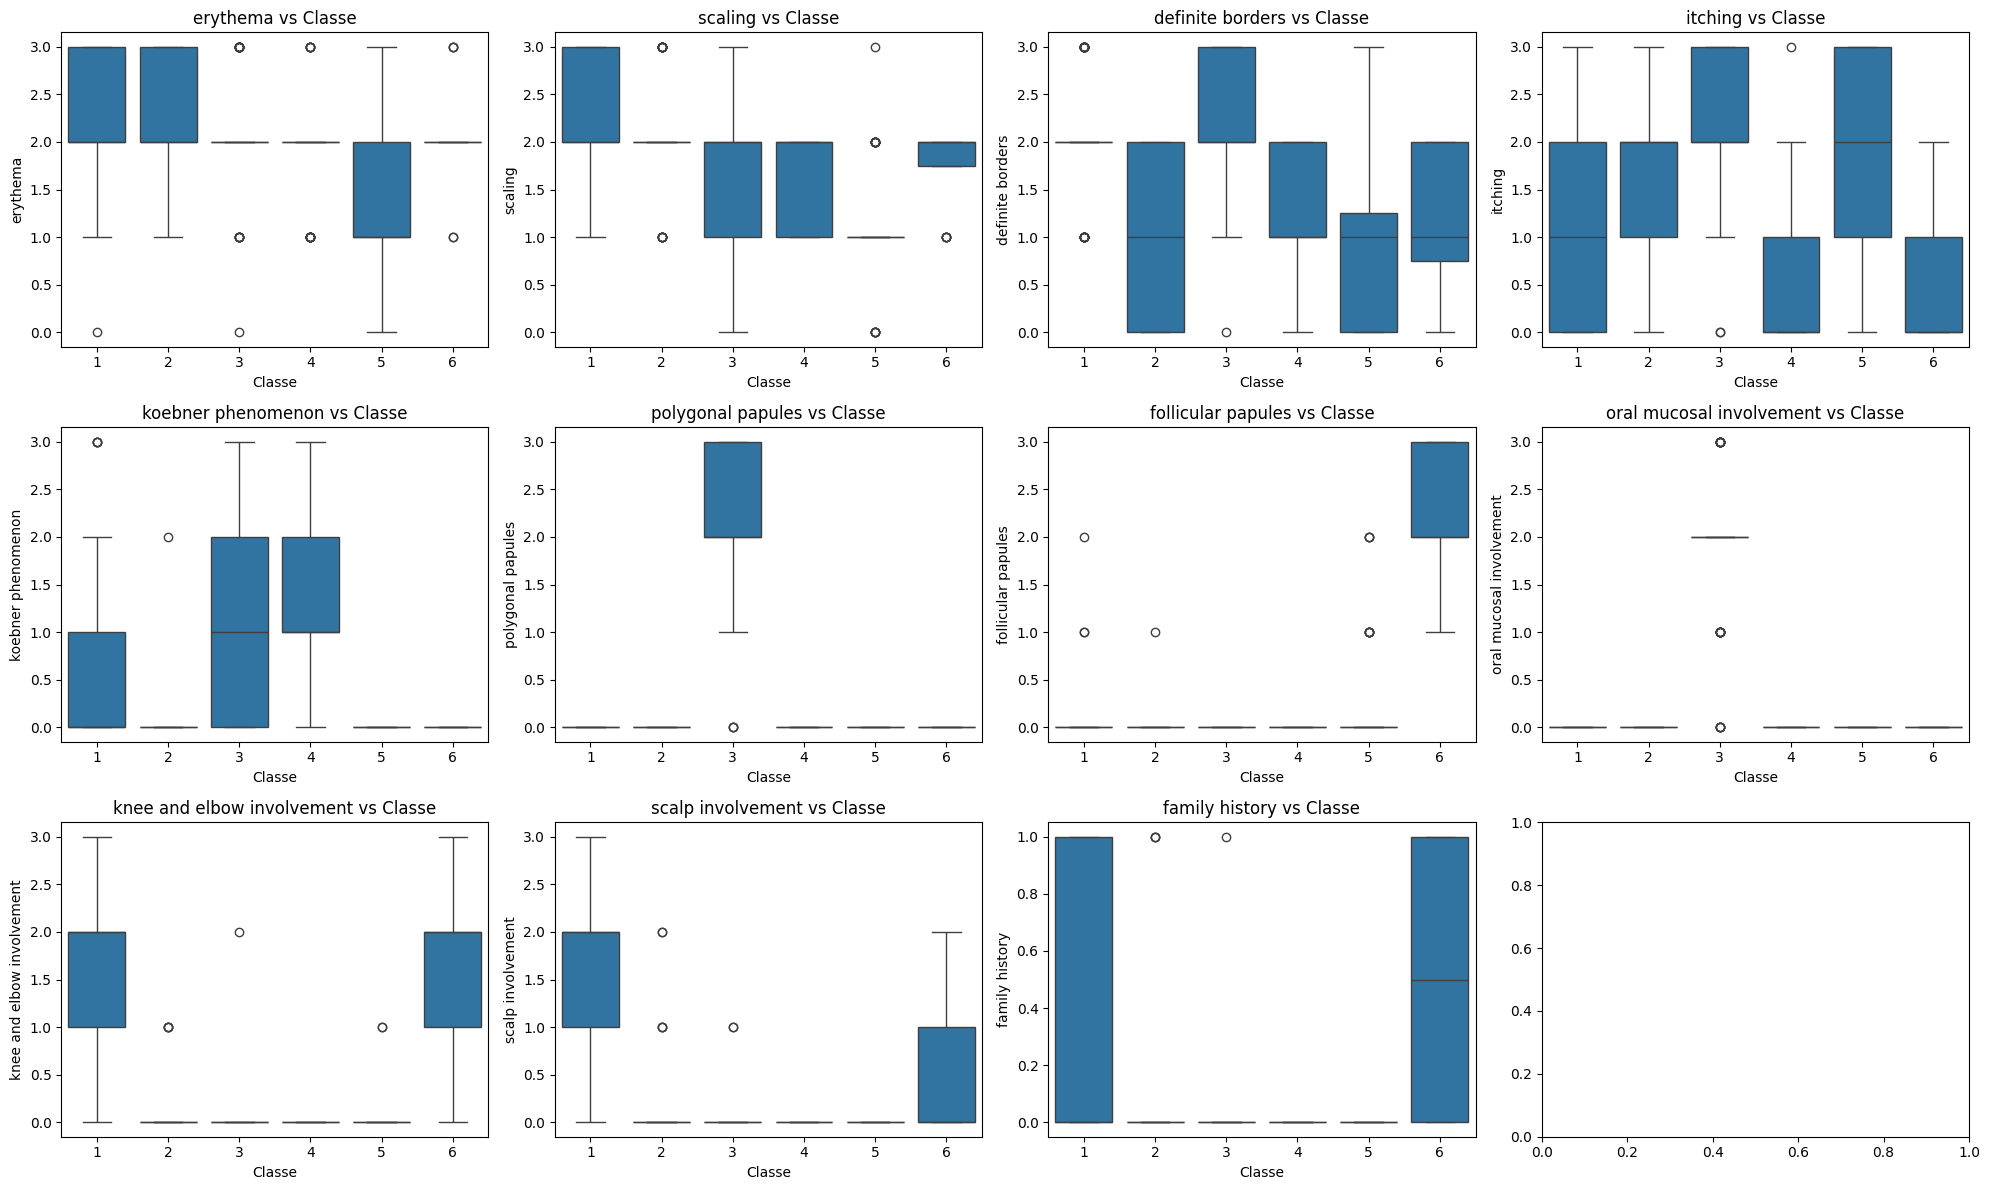

In [59]:
# Boxplot pour étudier les relations entre les attributs cliniques et la classe
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(clinical_features.columns):
    sns.set_palette("Set3")
    sns.boxplot(data=data, x='class', y=col, ax=axes[i])
    axes[i].set_title(f"{col} vs Classe")
    axes[i].set_xlabel("Classe")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()
